In [1]:
import os, time, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read data
data_dir = "./Data/ml-100k"
train_file_name = "ua.base"
test_file_name = "ua.test"

# Read user profile
users_file_path = os.path.join(data_dir, "u.user")
u_cols = ["user_id", "age", "sex", "occupation", "zipcode"]
users = pd.read_csv(users_file_path, sep='|', names=u_cols)
print(users.info(), "\n")
print(users.head())
print("\nNumber users : ", users.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
sex           943 non-null object
occupation    943 non-null object
zipcode       943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB
None 

   user_id  age sex  occupation zipcode
0        1   24   M  technician   85711
1        2   53   F       other   94043
2        3   23   M      writer   32067
3        4   24   M  technician   43537
4        5   33   F       other   15213

Number users :  943


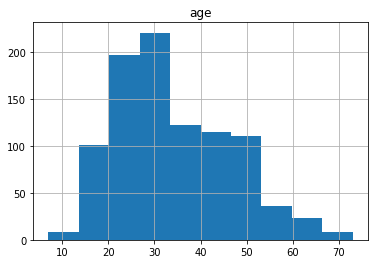

count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64

In [5]:
# Quickly look insight data
# Age distribution
users.hist(column="age")
plt.show()
users["age"].describe()

Number occupations :  21


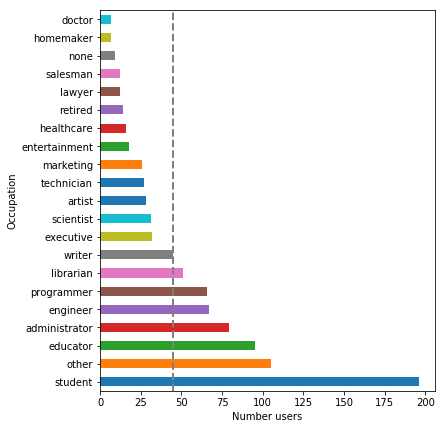

In [6]:
# Stats about occupation
users_occupation_stat = users["occupation"].value_counts()
ax = users_occupation_stat.plot.barh(figsize=(6,7), rot=0)
ax.set(xlabel="Number users", ylabel="Occupation")
ax.axvline(users_occupation_stat.mean(), color='gray', linestyle="--", lw=2)
print("Number occupations : ",users_occupation_stat.shape[0])

In [7]:
# Stats about sex
users_sex_stat = users.sex.value_counts().rename({"M": "Male", "F": 'Female'})
users_sex_stat = users_sex_stat / users_sex_stat.sum() * 100
users_sex_stat.apply(lambda x: "{:.2f}%".format(x))

Male      71.05%
Female    28.95%
Name: sex, dtype: object

In [16]:
# Read rating file
r_cols = ["user_id", "movie_id", "rating", "unix_timestamp"]
rating_base_path = os.path.join(data_dir, train_file_name)
rating_test_path = os.path.join(data_dir, test_file_name)

rating_base = pd.read_csv(rating_base_path, sep="\t", names=r_cols)
rating_test = pd.read_csv(rating_test_path, sep="\t", names=r_cols)

print("Info training data :"); print(rating_base.info())
print("Example : \n", rating_base.head())

Info training data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90570 entries, 0 to 90569
Data columns (total 4 columns):
user_id           90570 non-null int64
movie_id          90570 non-null int64
rating            90570 non-null int64
unix_timestamp    90570 non-null int64
dtypes: int64(4)
memory usage: 2.8 MB
None
Example : 
    user_id  movie_id  rating  unix_timestamp
0        1         1       5       874965758
1        1         2       3       876893171
2        1         3       4       878542960
3        1         4       3       876893119
4        1         5       3       889751712


In [17]:
print("Info test data :"); print(rating_test.info())
print("Example : \n", rating_test.head())

Info test data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9430 entries, 0 to 9429
Data columns (total 4 columns):
user_id           9430 non-null int64
movie_id          9430 non-null int64
rating            9430 non-null int64
unix_timestamp    9430 non-null int64
dtypes: int64(4)
memory usage: 294.8 KB
None
Example : 
    user_id  movie_id  rating  unix_timestamp
0        1        20       4       887431883
1        1        33       4       878542699
2        1        61       4       878542420
3        1       117       3       874965739
4        1       155       2       878542201


4    30858
3    24721
5    19048
2    10375
1     5568
Name: rating, dtype: int64


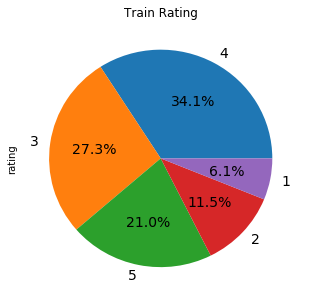

In [44]:
# Draw pie chart about rating
rating_stat = rating_base["rating"].value_counts()
print(rating_stat)
rating_stat.plot(kind="pie", labels=rating_stat.index, fontsize=14, autopct="%.1f%%", figsize=(5,5), title="Train Rating")